### Clustering Fossil fuels and Ores consumption

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [72]:
#Read the Energy use csv file into a DataFrame:
df1=pd.read_csv("C:\\Users\\ibsi\\Desktop\\Final project\\Data-analysis\\Datasets\\Fossil fuels DMC tonnes.csv")
#df=df.rename(columns={"Country Name": "Country"})
df1.head()

,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,1934318.0,1971455.0,2133747.0,2025973.0,2179800.0,2195665.0,1910883.0,1929968.0,1853614.0,...,455870.0,599746.0,824750.0,838088.0,862387.0,1455709.0,1626020.0,1726737.0,1827453.0,1928169.0
1,Africa,103149904.0,105186617.0,106639492.0,113261704.0,118731114.0,125567553.0,130421852.0,141666136.0,149524658.0,...,472242859.0,471972065.0,470321465.0,476297346.0,468558623.0,467557855.0,492757760.0,479833553.0,486847427.0,496183862.0
2,Albania,1664480.0,1707452.0,1960790.0,1798434.0,1897542.0,2045492.0,2207898.0,2338898.0,2771472.0,...,1474030.0,1504156.0,1522684.0,1492062.0,1169070.0,1620204.0,1797790.0,1811218.0,1879226.0,1948481.0
3,Algeria,4749024.0,5163008.0,5215979.0,5343203.0,5575650.0,6225788.0,4261868.0,9016175.0,11448052.0,...,33757467.0,36187303.0,35800467.0,37113372.0,40566317.0,42407606.0,46843042.0,48143222.0,49406554.0,50689887.0
4,Angola,1182784.0,1176204.0,584014.0,1059648.0,1127772.0,982648.0,731780.0,664644.0,1048644.0,...,5613120.0,5337960.0,5427160.0,5711000.0,6988840.0,6675931.0,7607831.0,8965596.0,9014628.0,9063661.0


In [73]:
# We need to drop the regions (reffered to as Invalid in the below list) from the original dataset. 

General_terms = [
"Africa", 
"Asia + Pacific", 
"EECCA",
"Ethiopia (Former)",
"Europe",
"Latin America + Caribbean",
"North America",
"Serbia (and Montenegro)",
"Sudan (Former)",
"USSR",
"West Asia",
"Yugoslavia SFR"]

for c in General_terms:
    df1=df1.drop(df1.index[df1["Country"]==c].to_list(), axis=0)
df1.head()

,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,1934318.0,1971455.0,2133747.0,2025973.0,2179800.0,2195665.0,1910883.0,1929968.0,1853614.0,...,455870.0,599746.0,824750.0,838088.0,862387.0,1455709.0,1626020.0,1726737.0,1827453.0,1928169.0
2,Albania,1664480.0,1707452.0,1960790.0,1798434.0,1897542.0,2045492.0,2207898.0,2338898.0,2771472.0,...,1474030.0,1504156.0,1522684.0,1492062.0,1169070.0,1620204.0,1797790.0,1811218.0,1879226.0,1948481.0
3,Algeria,4749024.0,5163008.0,5215979.0,5343203.0,5575650.0,6225788.0,4261868.0,9016175.0,11448052.0,...,33757467.0,36187303.0,35800467.0,37113372.0,40566317.0,42407606.0,46843042.0,48143222.0,49406554.0,50689887.0
4,Angola,1182784.0,1176204.0,584014.0,1059648.0,1127772.0,982648.0,731780.0,664644.0,1048644.0,...,5613120.0,5337960.0,5427160.0,5711000.0,6988840.0,6675931.0,7607831.0,8965596.0,9014628.0,9063661.0
5,Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
df1 = df1.reset_index(drop=True)
df1.head()

,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,1934318.0,1971455.0,2133747.0,2025973.0,2179800.0,2195665.0,1910883.0,1929968.0,1853614.0,...,455870.0,599746.0,824750.0,838088.0,862387.0,1455709.0,1626020.0,1726737.0,1827453.0,1928169.0
1,Albania,1664480.0,1707452.0,1960790.0,1798434.0,1897542.0,2045492.0,2207898.0,2338898.0,2771472.0,...,1474030.0,1504156.0,1522684.0,1492062.0,1169070.0,1620204.0,1797790.0,1811218.0,1879226.0,1948481.0
2,Algeria,4749024.0,5163008.0,5215979.0,5343203.0,5575650.0,6225788.0,4261868.0,9016175.0,11448052.0,...,33757467.0,36187303.0,35800467.0,37113372.0,40566317.0,42407606.0,46843042.0,48143222.0,49406554.0,50689887.0
3,Angola,1182784.0,1176204.0,584014.0,1059648.0,1127772.0,982648.0,731780.0,664644.0,1048644.0,...,5613120.0,5337960.0,5427160.0,5711000.0,6988840.0,6675931.0,7607831.0,8965596.0,9014628.0,9063661.0
4,Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
# We are interested in the data from the last 8 years only for calculations:

df1=df1[["Country","2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]]

In [76]:
#Calculating the average Energy use from 2010 to 2017:

df1["Fossil_fuel_consumption"]=round(df1[["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]].mean(axis=1))/100
df1.head()

,Country,2010,2011,2012,2013,2014,2015,2016,2017,Fossil_fuel_consumption
0,Afghanistan,824750.0,838088.0,862387.0,1455709.0,1626020.0,1726737.0,1827453.0,1928169.0,13861.64
1,Albania,1522684.0,1492062.0,1169070.0,1620204.0,1797790.0,1811218.0,1879226.0,1948481.0,16550.92
2,Algeria,35800467.0,37113372.0,40566317.0,42407606.0,46843042.0,48143222.0,49406554.0,50689887.0,438713.08
3,Angola,5427160.0,5711000.0,6988840.0,6675931.0,7607831.0,8965596.0,9014628.0,9063661.0,74318.31
4,Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


In [77]:
#Read the Energy use csv file into a DataFrame:
df2=pd.read_csv("C:\\Users\\ibsi\\Desktop\\Final project\\Data-analysis\\Datasets\\Metal Ores DMC tonnes.csv")
#df=df.rename(columns={"Country Name": "Country"})
df2.head()

,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,4125.0,7782.0,6698.0,3714.0,4917.0,6015.0,4913.0,5383.0,0.0,...,46049.0,32980.0,79252.0,106188.0,107904.0,117303.0,123300.0,129719.0,136138.0,142556.0
1,Africa,370410975.0,369798222.0,366318628.0,371337316.0,359747994.0,345722552.0,364233837.0,369899546.0,365310503.0,...,319394406.0,315125864.0,379622297.0,365901589.0,370520430.0,402935191.0,414442197.0,459193547.0,505306257.0,551419717.0
2,Albania,1767905.0,1870887.0,2064317.0,1979127.0,2099127.0,2607571.0,2603651.0,2719365.0,2994127.0,...,537675.0,656752.0,318709.0,372037.0,866055.0,918743.0,1057382.0,1065381.0,1073379.0,1081377.0
3,Algeria,1003493.0,1579683.0,4095157.0,2601712.0,1444176.0,2140324.0,2849471.0,3620461.0,3079204.0,...,7470560.0,7589692.0,6641148.0,7016810.0,9962501.0,7824828.0,8313147.0,8749416.0,9153810.0,9557753.0
4,Angola,25199.0,711367.0,29211.0,19395.0,420547.0,5611750.0,5507750.0,5500000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
# We need to drop the regions (reffered to as Invalid in the below list) from the original dataset. 

General_terms = [
"Africa", 
"Asia + Pacific", 
"EECCA",
"Ethiopia (Former)",
"Europe",
"Latin America + Caribbean",
"North America",
"Serbia (and Montenegro)",
"Sudan (Former)",
"USSR",
"West Asia",
"Yugoslavia SFR"]

for c in General_terms:
    df2=df2.drop(df2.index[df2["Country"]==c].to_list(), axis=0)
df2.head()

,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,4125.0,7782.0,6698.0,3714.0,4917.0,6015.0,4913.0,5383.0,0.0,...,46049.0,32980.0,79252.0,106188.0,107904.0,117303.0,123300.0,129719.0,136138.0,142556.0
2,Albania,1767905.0,1870887.0,2064317.0,1979127.0,2099127.0,2607571.0,2603651.0,2719365.0,2994127.0,...,537675.0,656752.0,318709.0,372037.0,866055.0,918743.0,1057382.0,1065381.0,1073379.0,1081377.0
3,Algeria,1003493.0,1579683.0,4095157.0,2601712.0,1444176.0,2140324.0,2849471.0,3620461.0,3079204.0,...,7470560.0,7589692.0,6641148.0,7016810.0,9962501.0,7824828.0,8313147.0,8749416.0,9153810.0,9557753.0
4,Angola,25199.0,711367.0,29211.0,19395.0,420547.0,5611750.0,5507750.0,5500000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,541.0,47.0,...,0.0,16759.0,13561.0,193.0,1780.0,7189.0,7217.0,5665.0,4113.0,2561.0


In [79]:
df2 = df2.reset_index(drop=True)
df2.head()

,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,4125.0,7782.0,6698.0,3714.0,4917.0,6015.0,4913.0,5383.0,0.0,...,46049.0,32980.0,79252.0,106188.0,107904.0,117303.0,123300.0,129719.0,136138.0,142556.0
1,Albania,1767905.0,1870887.0,2064317.0,1979127.0,2099127.0,2607571.0,2603651.0,2719365.0,2994127.0,...,537675.0,656752.0,318709.0,372037.0,866055.0,918743.0,1057382.0,1065381.0,1073379.0,1081377.0
2,Algeria,1003493.0,1579683.0,4095157.0,2601712.0,1444176.0,2140324.0,2849471.0,3620461.0,3079204.0,...,7470560.0,7589692.0,6641148.0,7016810.0,9962501.0,7824828.0,8313147.0,8749416.0,9153810.0,9557753.0
3,Angola,25199.0,711367.0,29211.0,19395.0,420547.0,5611750.0,5507750.0,5500000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,541.0,47.0,...,0.0,16759.0,13561.0,193.0,1780.0,7189.0,7217.0,5665.0,4113.0,2561.0


In [80]:
# We are interested in the data from the last 8 years only for calculations:

df2=df2[["Country","2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]]

In [81]:
df2["Ores_consumption"]=round(df2[["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]].mean(axis=1))/10
df2.head()

,Country,2010,2011,2012,2013,2014,2015,2016,2017,Ores_consumption
0,Afghanistan,79252.0,106188.0,107904.0,117303.0,123300.0,129719.0,136138.0,142556.0,11779.5
1,Albania,318709.0,372037.0,866055.0,918743.0,1057382.0,1065381.0,1073379.0,1081377.0,84413.3
2,Algeria,6641148.0,7016810.0,9962501.0,7824828.0,8313147.0,8749416.0,9153810.0,9557753.0,840242.7
3,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Antigua and Barbuda,13561.0,193.0,1780.0,7189.0,7217.0,5665.0,4113.0,2561.0,528.5


In [82]:
df1=df1[["Country", "Fossil_fuel_consumption"]]
df1.head()

,Country,Fossil_fuel_consumption
0,Afghanistan,13861.64
1,Albania,16550.92
2,Algeria,438713.08
3,Angola,74318.31
4,Antigua and Barbuda,0.00


In [83]:
df2=df2[["Country", "Ores_consumption"]]
df2.head()

,Country,Ores_consumption
0,Afghanistan,11779.5
1,Albania,84413.3
2,Algeria,840242.7
3,Angola,0.0
4,Antigua and Barbuda,528.5


In [84]:
#df=df1.merge(df2, join_on="Country", right_on="Country")
df=pd.merge(df1, df2, on="Country", how="inner")
df=df.drop(df.index[df["Country"]== "China"], axis=0)
df=df.drop(df.index[df["Country"]== "India"], axis=0)
df=df.drop(df.index[df["Country"]== "United States of America"], axis=0)
df=df.drop(df.index[df["Country"]== "Indonesia"], axis=0)

df=df.dropna()

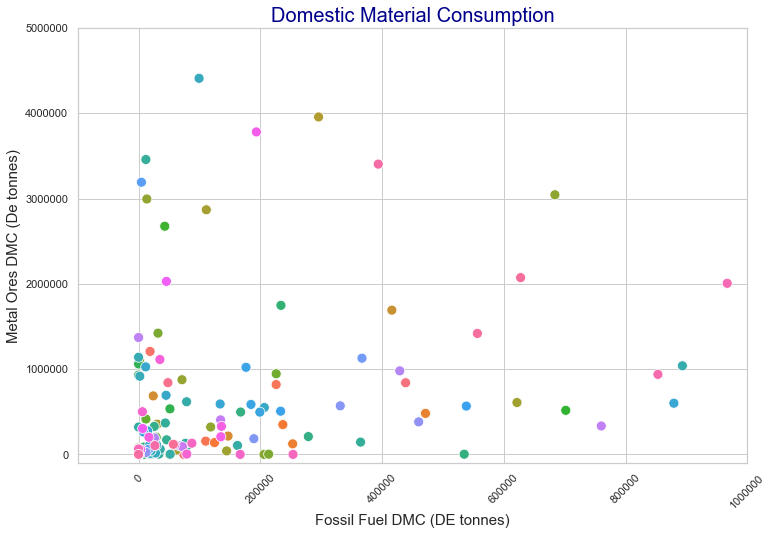

In [85]:
plt.figure(figsize=(12,8))
a=sns.scatterplot(data=df,
                x="Fossil_fuel_consumption",
                y="Ores_consumption",
                hue="Country",
               legend=False, s=100)
a.set(xlim=(-100000, 1000000))
a.set(ylim=(-100000, 5000000));
plt.xticks(rotation=45);
a.set_xlabel("Fossil Fuel DMC (DE tonnes)", size= 15);
a.set_ylabel("Metal Ores DMC (De tonnes)", size= 15);
a.set_title("Domestic Material Consumption",size= 20, color="DarkBlue");
plt.savefig("C:\\Users\\ibsi\\Desktop\\Figure_5", transparent=True, bbox_inches="tight")

Clustering the countries according to their Fossil Fuel and Metal Ores consumption (Using k-means):

In [86]:
from sklearn.cluster import KMeans

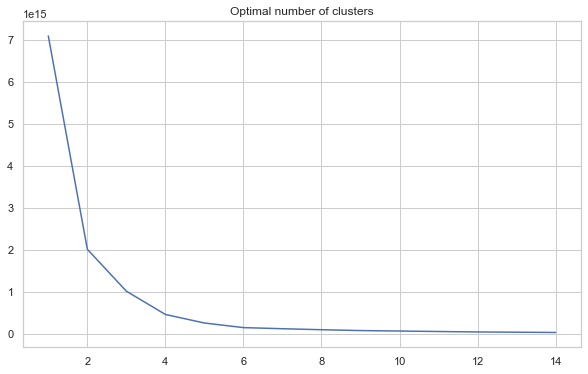

In [87]:
#Determining the number of clusters:

X = df[["Fossil_fuel_consumption", "Ores_consumption"]]
inertias = {}
for k in range(1,15):
    cl = KMeans(n_clusters=k).fit(X)
    inertias[k] = cl.inertia_
    
plt.figure(figsize=(10,6))
sns.lineplot(x=list(inertias.keys()),
             y=list(inertias.values()));
plt.title("Optimal number of clusters");

In [91]:
X = df[["Fossil_fuel_consumption", "Ores_consumption"]]

def cluster_2d(X, n_clusters=2):
    clusters = KMeans(n_clusters=n_clusters)
    clusters.fit(X)
    
    x, y = X.columns
    sns.scatterplot(data=X,
                x=x,
                y=y,
                hue=clusters.predict(X),
                palette="pastel");
    set(xlim=(-100000, 1000000))
    set(ylim=(-100000, 5000000));
    print(f"Inertia: {clusters.inertia_}")

Inertia: 144851184421428.88


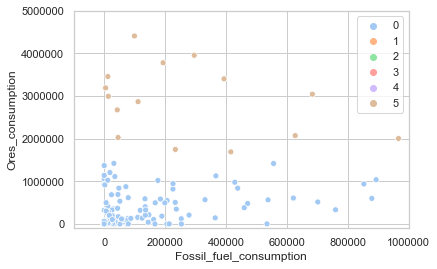

In [70]:
cluster_2d(X,6)